In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

In [2]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

#for model evaluation
from sklearn.metrics import roc_curve, auc 
from matplotlib import pyplot

In [3]:
orig_df = pd.read_csv('Imputed_Data.csv')

# set the max columns to none
pd.set_option('display.max_columns', None)

orig_df.head()

,Unnamed: 0,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,Comorbidities
0,0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,4.0
1,1,1,139812,0.0,75,2,30.188278,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,2.0
2,2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,2.0
3,3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0.0
4,4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,4.0


In [4]:
orig_df.columns

Index(['Unnamed: 0', 'group', 'ID', 'outcome', 'age', 'gendera', 'BMI',
       'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
       'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure',
       'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF', 'Comorbidities'],
      dtype='object')

In [5]:
df = orig_df[['outcome', 'Urine output', 'RDW',
       'Leucocyte', 'Lymphocyte', 'Urea nitrogen', 'Blood calcium', 'Anion gap',
       'Bicarbonate', 'Lactic acid', 'INR']].copy()
df.head()

,outcome,Urine output,RDW,Leucocyte,Lymphocyte,Urea nitrogen,Blood calcium,Anion gap,Bicarbonate,Lactic acid,INR
0,0.0,2155.0,16.220000,7.650000,13.300000,50.000000,7.463636,13.166667,21.166667,0.5,1.000000
1,0.0,1425.0,14.260000,12.740000,12.232717,20.333333,8.162500,11.444444,33.444444,0.5,1.626064
2,0.0,2425.0,23.820000,5.480000,24.500000,33.857143,8.266667,10.000000,30.571429,0.5,0.950000
3,0.0,8760.0,17.037500,8.225000,14.500000,15.285714,9.476923,12.357143,38.571429,0.6,2.666667
4,0.0,4455.0,16.266667,8.833333,12.232717,43.000000,8.733333,15.166667,22.000000,0.6,1.626064


In [6]:
# Create our features
X = df.drop('outcome', axis=1)
y = df['outcome']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
print("Shape of X_train:" ,X_train.shape)
print("Shape of y_train:" ,y_train.shape)
print("Shape of X_test:"  ,X_test.shape)
print("Shape of y_test:"  ,y_test.shape)

Shape of X_train: (882, 10)
Shape of y_train: (882,)
Shape of X_test: (294, 10)
Shape of y_test: (294,)


In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression Model

In [10]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)
lrm.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [11]:
# Calculated the balanced accuracy score
y_pred_lrm = lrm.predict(X_test)
balanced_accuracy_score(y_test, y_pred_lrm)

0.6055582061068703

In [12]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_lrm)

array([[260,   2],
       [ 25,   7]], dtype=int64)

In [13]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_lrm))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.91      0.99      0.22      0.95      0.47      0.23       262
        1.0       0.78      0.22      0.99      0.34      0.47      0.20        32

avg / total       0.90      0.91      0.30      0.88      0.47      0.23       294



In [14]:
importances = pd.DataFrame(data={
    'Feature': X.columns,
    'Importance': lrm.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

         Feature  Importance
8    Lactic acid    0.347298
4  Urea nitrogen    0.326340
2      Leucocyte    0.226097
9            INR    0.198349
6      Anion gap    0.190380
1            RDW    0.178939
7    Bicarbonate   -0.042747
3     Lymphocyte   -0.208175
0   Urine output   -0.354821
5  Blood calcium   -0.383754


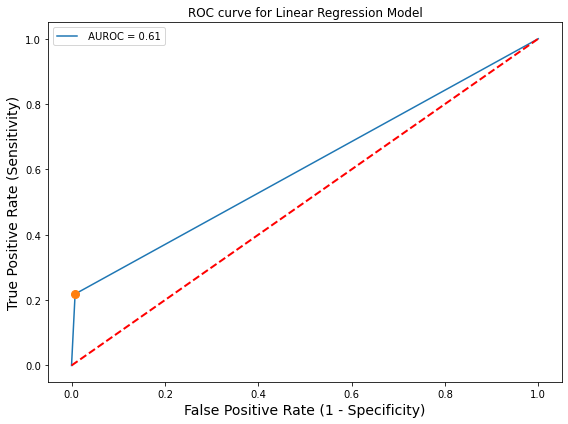

In [15]:
#roc-curve
fig, (ax2) = plt.subplots(figsize = (8,6))
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred_lrm)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Linear Regression Model')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# Balanced Random Forest Classifier

In [ ]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=300, random_state=1)
brf.fit(X_train, y_train) 

In [ ]:
# Calculated the balanced accuracy score
y_pred_brf = brf.predict(X_test)
balanced_accuracy_score(y_test, y_pred_brf)

In [ ]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_brf)

In [ ]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_brf))

In [ ]:
# List the features sorted in descending order by feature importance
sorted(zip(brf.feature_importances_, X.columns), reverse=True)

In [ ]:
#roc-curve
fig, (ax2) = plt.subplots(figsize = (8,6))
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred_brf)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for RandomForestClassifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# Easy Ensemble AdaBoost Classifier

In [ ]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=1)
eec.fit(X_train, y_train)

In [ ]:
# Calculated the balanced accuracy score
y_pred_eec = eec.predict(X_test)
balanced_accuracy_score(y_test, y_pred_eec)

In [ ]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_eec)

In [ ]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_eec))

In [ ]:
#roc-curve
fig, (ax2) = plt.subplots(figsize = (8,6))
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred_eec)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for AdaBoost Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# XGB Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn import metrics
# Creating model object
xgb = XGBClassifier(n_estimator=200, random_state=1)
xgb.fit(X_train, y_train)

In [ ]:
# Calculated the balanced accuracy score
y_pred_xgb = xgb.predict(X_test)
balanced_accuracy_score(y_test, y_pred_xgb)

In [ ]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_xgb)

In [ ]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_xgb))

In [ ]:
#roc-curve
fig, (ax2) = plt.subplots(figsize = (8,6))
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred_xgb)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for XGBClassifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# Neural Network

In [ ]:
import tensorflow as tf

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 11
hidden_nodes_layer3 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train, y_train,epochs=100)

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")